In [ ]:
##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from collections import Counter
import random

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Number of unique classes
num_classes = len(np.unique(y_train))
print("Number of unique classes:", num_classes)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 24s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step
Number of unique classes: 10


In [2]:
# Define class names
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

print("Training shape:", x_train.shape)
print("Test shape:", x_test.shape)


Training shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


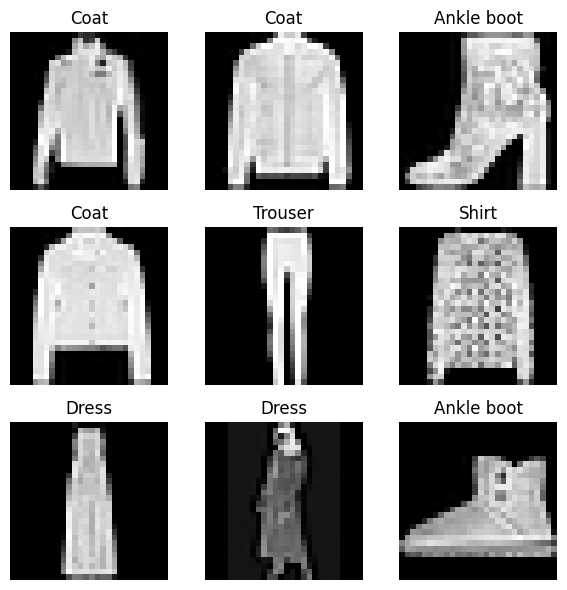

In [3]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(6, 6))
for i in range(9):
    idx = random.randint(0, len(x_train) - 1)
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[idx], cmap="gray")
    plt.title(class_names[y_train[idx]])
    plt.axis("off")
plt.tight_layout()
plt.show()


Class distribution in training set:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000

Class Distribution:
Ankle boot: 6000
T-shirt/top: 6000
Dress: 6000
Pullover: 6000
Sneaker: 6000
Sandal: 6000
Trouser: 6000
Shirt: 6000
Coat: 6000
Bag: 6000


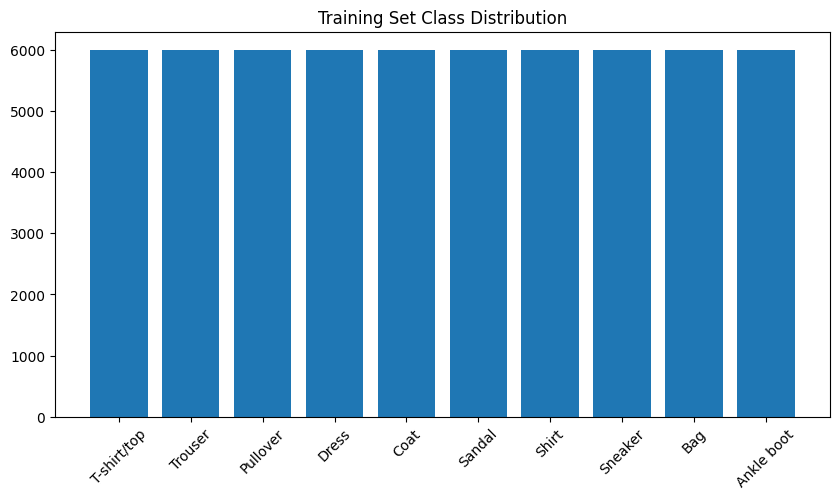

In [4]:
# Count occurrences of each class in the training set
from collections import Counter

class_counts = Counter(y_train)

print("\nClass distribution in training set:")
for class_index, count in sorted(class_counts.items()):
    print(f"{class_names[class_index]}: {count}")

# Plot the class distribution
class_counts = Counter(y_train)
print("\nClass Distribution:")
for cls, count in class_counts.items():
    print(f"{class_names[cls]}: {count}")

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.bar([class_names[i] for i in range(10)],
        [class_counts[i] for i in range(10)])
plt.xticks(rotation=45)
plt.title("Training Set Class Distribution")
plt.show()


### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [5]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Normalize pixel values for x_train and x_test
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


# Build a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # IMPORTANT
    metrics=["accuracy"]
)

# Train the model
model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

c:\Users\96655\anaconda3\envs\cv2_lab\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7716 - loss: 0.6329 - val_accuracy: 0.8543 - val_loss: 0.4057
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8483 - loss: 0.4235 - val_accuracy: 0.8755 - val_loss: 0.3391
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8673 - loss: 0.3648 - val_accuracy: 0.8822 - val_loss: 0.3174
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8803 - loss: 0.3319 - val_accuracy: 0.8893 - val_loss: 0.2956
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8882 - loss: 0.3090 - val_accuracy: 0.8986 - val_loss: 0.2761
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8956 - loss: 0.2891 - val_accuracy: 0.8999 - val_loss: 0.2704
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8997 - loss: 0.2715 - val_accuracy: 0.9005 - val_loss: 0.2637
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9061 - loss: 0.2556 - v